In [7]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [2]:
mnist = input_data.read_data_sets("MNIST_data/" , one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
print(mnist.train.images)
print(len(mnist.train.images))
print(len(mnist.train.images[1]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
55000
784


In [9]:
x = tf.placeholder(tf.float32 , [None , 784] , name='x')

In [10]:
W = tf.Variable(tf.zeros([784 , 10]))
b = tf.Variable(tf.zeros([10]))

In [11]:
y = tf.nn.softmax(tf.matmul(x,W) +b)

In [12]:
y_ = tf.placeholder(tf.float32 , [None , 10])

# Loss functiom : Cross Entorpy

In [63]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y) , reduction_indices=[1])) # 1 이면 Row , 0 이면 column 을 다 더한다.

In [64]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [65]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [66]:
for _ in range(1000):
    batch_xs , batch_ys = mnist.train.next_batch(100)
    sess.run(train_step , feed_dict={x:batch_xs , y_:batch_ys})

In [67]:
corr_prediction = tf.equal(tf.argmax(y,1) , tf.argmax(y_ , 1))

In [68]:
acc = tf.reduce_mean(tf.cast(corr_prediction , tf.float32))

In [69]:
print(sess.run(acc , feed_dict={x:mnist.test.images , y_:mnist.test.labels}))

0.9174


In [26]:
import random
import matplotlib.pyplot as plt


ind : 15 , label: [9] , pred : [3]
ind : 23 , label: [7] , pred : [9]
ind : 29 , label: [4] , pred : [8]
ind : 36 , label: [7] , pred : [9]


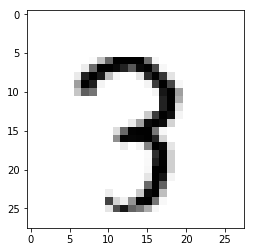

In [78]:
r =  0 
l,p = [],[]
for i in range(50):
    r = random.randint(0 , mnist.test.num_examples - 1)
    l = sess.run(tf.argmax(mnist.test.labels[r:r+1] , 1))
    p = sess.run(tf.argmax(y,1), feed_dict={x:mnist.test.images[r:r+1]})
    if( l != p):
        print("ind : %d , label: %s , pred : %s" % (i ,  l , p) )

plt.imshow(mnist.test.images[r:r+1].reshape(28,28) , cmap="Greys")
plt.show()